## 2024 March Madness Predictions

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def format_float(x):
    return '{:.2f}'.format(x)

# Set the display option to use the formatting function for floating-point numbers
pd.set_option('display.float_format', format_float)

import sys
sys.path.append('../models')

### Load Random Forest Model

In [7]:
import joblib
rf = joblib.load('../models/rf.pkl')


### Load data

In [8]:
df_2024 = pd.read_csv("data/2024_Scrubbed.csv")

### Create DF

In [9]:
X = df_2024.drop(columns=['TEAM'])

# Calculate probabilities using the Random Forest model
prob = [rf.predict_proba([row])[0] for index, row in X.iterrows()]
prob = [[round(p, 4) for p in row] for row in prob]
prob_df = pd.DataFrame(prob, columns=['R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'Champ'], index=X.index)

# Merge the probabilities DataFrame with the ratings DataFrame
df_2024 = pd.concat([df_2024, prob_df], axis=1)

# Reorder the columns
df_2024 = df_2024[['TEAM', 'R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'Champ']]

# Set the index to 'TEAM'
df_2024_pivot = df_2024.set_index('TEAM')

df_orig = df_2024_pivot.copy()

d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\MMPredictionsProject\venv\lib\site-pa

### Edit Data Frame to be Probability to Reach Each Round

In [10]:
for index, row in df_2024_pivot.iterrows():
    R32 = row['R32']
    S16 = row['S16']
    E8 = row['E8']
    F4 = row['F4']
    F2 = row['F2']
    df_2024_pivot.at[index, 'R32'] = 1 - row['R64']
    df_2024_pivot.at[index, 'S16'] = row['R32'] - R32
    df_2024_pivot.at[index, 'E8'] = row['S16'] - S16
    df_2024_pivot.at[index, 'F4'] = row['E8'] - E8
    df_2024_pivot.at[index, 'F2'] = row['F4'] - F4 

In [11]:
df_2024_pivot = df_2024_pivot.sort_values(by='R32', ascending=False)
del df_2024_pivot['R64']

### Create Tables By Region

In [12]:
df_East = df_2024_pivot[df_2024_pivot.index.isin(['Connecticut', 'Iowa St.', 'Illinois', 'Auburn', 'San Diego St.', 'BYU', 'Washington St.', "Florida Atlantic", 
                                                      'Northwestern', 'Drake', 'Duquesne', 'UAB', 'Yale', 'Morehead St.', 'South Dakota St.', 'Stetson'])]

df_South = df_2024_pivot[df_2024_pivot.index.isin(['Houston', 'Marquette', 'Kentucky', 'Duke', 'Wisconsin', 'Texas Tech', 'Florida', "Nebraska", 
                                                      'Texas A&M', 'Colorado', 'Boise St.', 'North Carolina St.', 'James Madison', 'Vermont', 'Oakland', 'Western Kentucky', 'Longwood'])]

df_Midwest = df_2024_pivot[df_2024_pivot.index.isin(['Purdue', 'Tennessee', 'Creighton', 'Kansas', 'Gonzaga', 'South Carolina', 'Texas', 'Utah St.', 
                                                      'TCU', 'Colorado St.', 'Virginia', 'Oregon', 'McNeese St.', 'Samford', 'Akron', "Saint Peter's", 'Grambling St', 'Montana St.'])]

df_West = df_2024_pivot[df_2024_pivot.index.isin(['North Carolina', 'Arizona', 'Baylor', 'Alabama', "Saint Mary's", 'Clemson', "Dayton", 
                                                      'Mississippi St.', 'Michigan St.', 'Nevada', "New Mexico", 'Grand Canyon', 'College of Charleston', 'Colgate', 'Long Beach St.', 'Howard', 'Wagner'])]

In [13]:
df_East

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Auburn,0.99,0.87,0.68,0.32,0.25,0.13
Connecticut,0.99,0.93,0.89,0.63,0.58,0.26
Iowa St.,0.97,0.77,0.41,0.15,0.08,0.07
San Diego St.,0.80,0.46,0.17,0.09,0.02,0.00
BYU,0.77,0.33,0.10,0.04,0.02,0.00
Illinois,0.64,0.44,0.14,0.07,0.01,0.00
Northwestern,0.62,0.23,0.12,0.02,0.00,0.00
Florida Atlantic,0.61,0.25,0.05,0.03,0.00,0.00
Washington St.,0.52,0.08,0.03,0.01,-0.00,0.00


In [14]:
df_South

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Houston,0.96,0.89,0.67,0.33,0.16,0.10
Duke,0.91,0.74,0.32,0.15,0.02,0.01
Marquette,0.88,0.57,0.25,0.15,0.01,0.00
Kentucky,0.83,0.62,0.18,0.13,0.03,0.00
Texas Tech,0.78,0.15,0.03,0.01,0.00,0.00
Wisconsin,0.74,0.54,0.15,0.11,0.02,0.00
Nebraska,0.70,0.21,0.04,0.03,0.01,0.00
Florida,0.68,0.27,0.11,0.06,0.01,0.00
Texas A&M,0.62,0.21,0.02,0.01,0.01,0.00


In [15]:
df_Midwest

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Purdue,0.97,0.81,0.72,0.56,0.46,0.25
Tennessee,0.95,0.69,0.52,0.24,0.11,0.07
Kansas,0.86,0.51,0.10,0.02,0.00,0.01
Gonzaga,0.83,0.53,0.18,0.13,0.02,0.00
Creighton,0.80,0.62,0.27,0.15,0.05,0.00
Texas,0.79,0.22,0.08,0.06,0.02,0.00
Colorado St.,0.55,0.08,0.03,0.01,-0.00,0.00
South Carolina,0.53,0.08,0.01,-0.00,-0.00,0.00
McNeese St.,0.50,0.05,0.04,-0.00,-0.00,0.00


In [16]:
df_West

,R32,S16,E8,F4,F2,Champ
TEAM,,,,,,
Arizona,0.97,0.85,0.69,0.31,0.25,0.14
Alabama,0.84,0.42,0.12,0.03,0.01,0.00
North Carolina,0.84,0.61,0.29,0.13,0.06,0.01
Baylor,0.83,0.41,0.11,0.00,0.00,0.00
Michigan St.,0.83,0.38,0.14,0.09,0.05,0.01
New Mexico,0.81,0.20,0.09,0.02,0.01,0.00
Mississippi St.,0.71,0.27,0.11,0.05,0.01,0.00
Saint Mary's,0.62,0.09,0.05,0.02,0.00,0.00
Clemson,0.49,0.09,0.03,0.02,0.00,0.00


### Create Stacked Bar Chart of Probabilities For Each Region

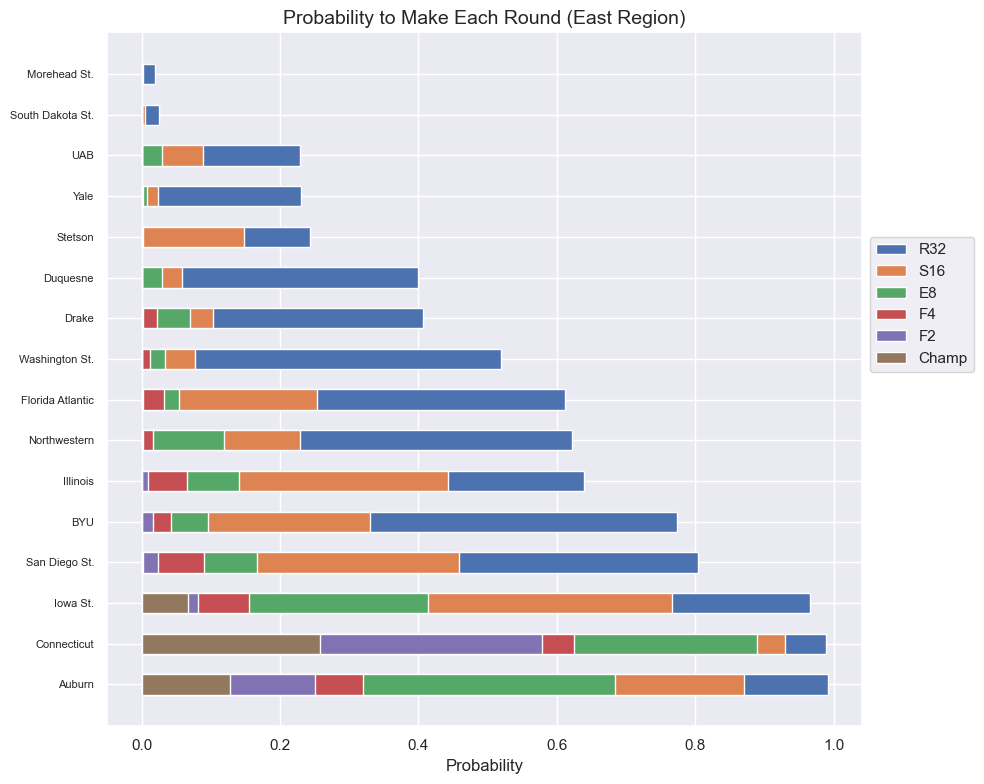

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data for stacked bar chart
rounds = df_East.columns
teams = df_East.index
probabilities = np.array(df_East.values.tolist())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the stacked bar chart
bar_positions = np.arange(len(teams))
bar_width = 0.5

for i, round_name in enumerate(rounds):
    ax.barh(bar_positions, probabilities[:, i], bar_width, label=round_name)

# Axis labels and title
ax.set_xlabel('Probability', fontsize=12)
ax.set_yticks(bar_positions)
ax.set_yticklabels(teams, fontsize=8)
ax.set_title('Probability to Make Each Round (East Region)', fontsize=14)

# Add legend
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

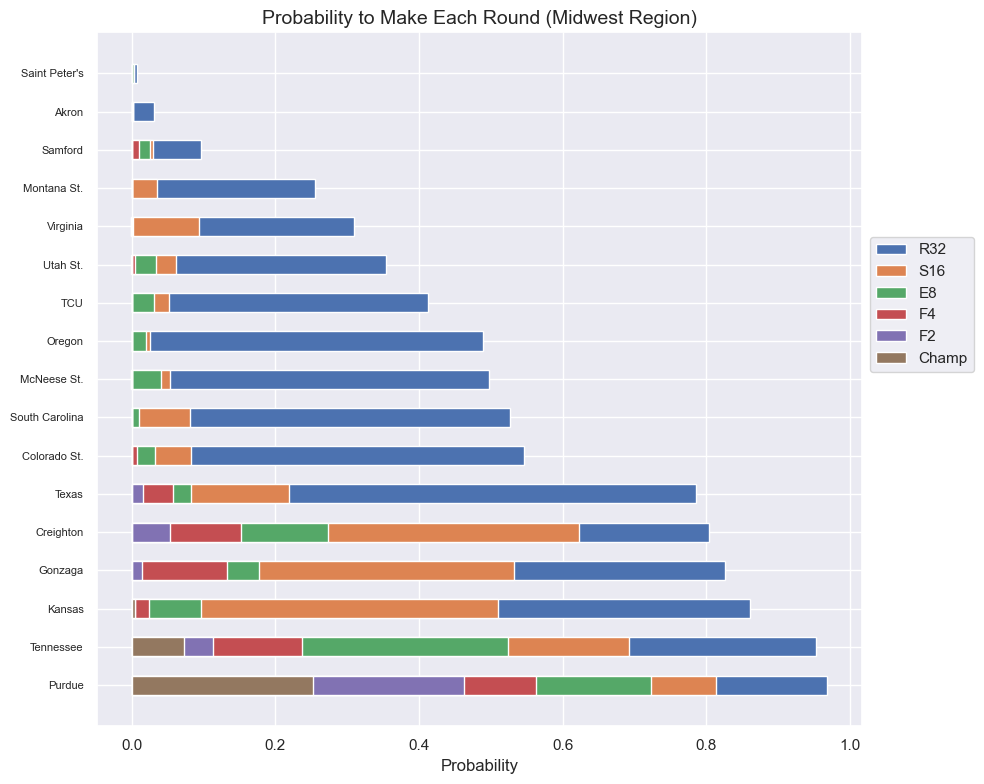

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data for stacked bar chart
rounds = df_Midwest.columns
teams = df_Midwest.index
probabilities = np.array(df_Midwest.values.tolist())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the stacked bar chart
bar_positions = np.arange(len(teams))
bar_width = 0.5

for i, round_name in enumerate(rounds):
    ax.barh(bar_positions, probabilities[:, i], bar_width, label=round_name)

# Axis labels and title
ax.set_xlabel('Probability', fontsize=12)
ax.set_yticks(bar_positions)
ax.set_yticklabels(teams, fontsize=8)
ax.set_title('Probability to Make Each Round (Midwest Region)', fontsize=14)

# Add legend
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

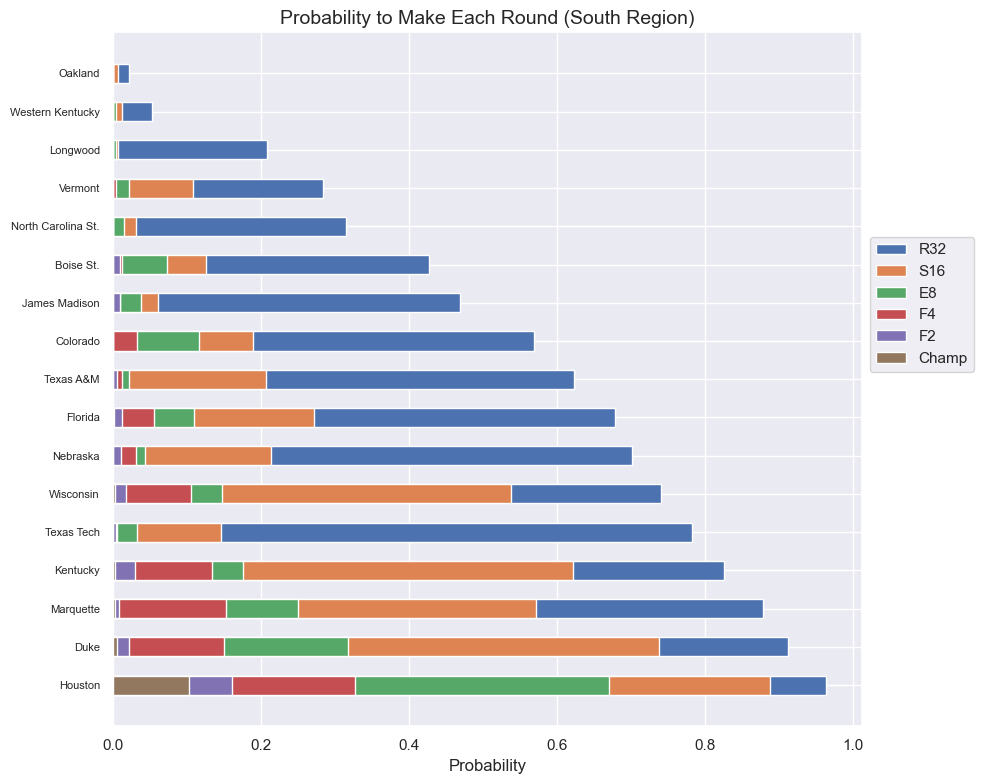

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data for stacked bar chart
rounds = df_South.columns
teams = df_South.index
probabilities = np.array(df_South.values.tolist())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the stacked bar chart
bar_positions = np.arange(len(teams))
bar_width = 0.5

for i, round_name in enumerate(rounds):
    ax.barh(bar_positions, probabilities[:, i], bar_width, label=round_name)

# Axis labels and title
ax.set_xlabel('Probability', fontsize=12)
ax.set_yticks(bar_positions)
ax.set_yticklabels(teams, fontsize=8)
ax.set_title('Probability to Make Each Round (South Region)', fontsize=14)

# Add legend
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

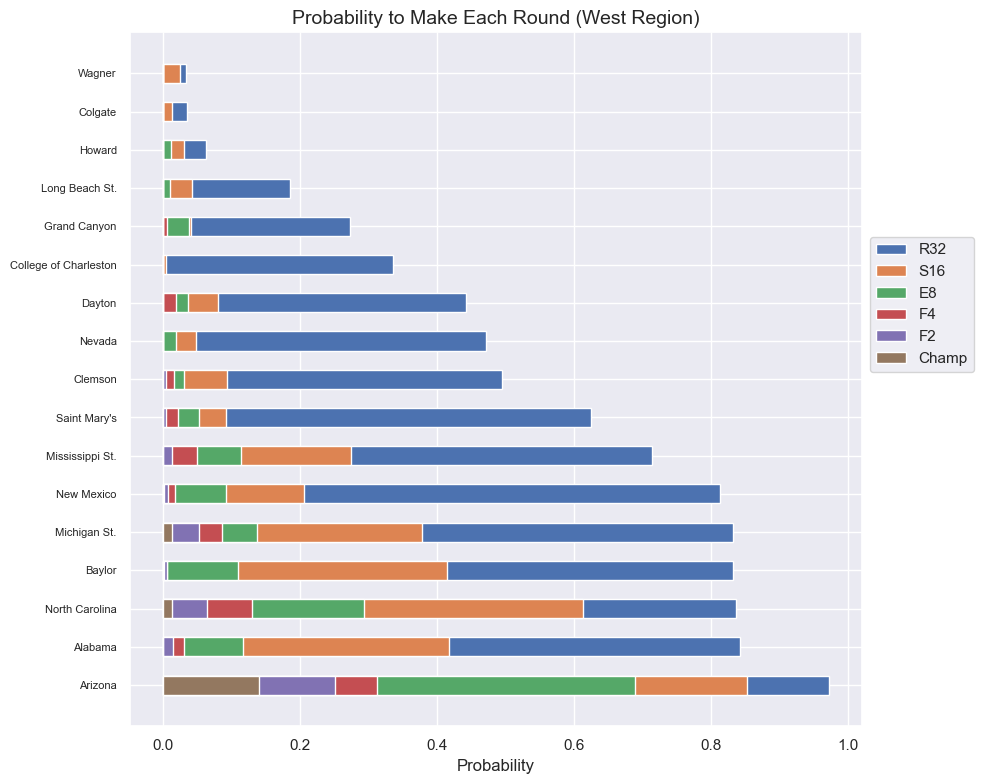

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the data for stacked bar chart
rounds = df_West.columns
teams = df_West.index
probabilities = np.array(df_West.values.tolist())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the stacked bar chart
bar_positions = np.arange(len(teams))
bar_width = 0.5

for i, round_name in enumerate(rounds):
    ax.barh(bar_positions, probabilities[:, i], bar_width, label=round_name)

# Axis labels and title
ax.set_xlabel('Probability', fontsize=12)
ax.set_yticks(bar_positions)
ax.set_yticklabels(teams, fontsize=8)
ax.set_title('Probability to Make Each Round (West Region)', fontsize=14)

# Add legend
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

# 2024 Evaluation

In [84]:
# Make predictions on the DataFrame X
pred_labels = rf.predict(X)

pred_labels_df = pd.DataFrame(pred_labels, index=X.index, columns=['Predicted'])

# Concatenate predictions with df_2024
pred_2024 = pd.concat([df_2024, pred_labels_df], axis=1)

pred_2024 = pred_2024[['TEAM', 'Predicted']]

print(pred_2024)


             TEAM  Predicted
0         Houston       3.00
1     Connecticut       5.00
2          Purdue       6.00
3        Iowa St.       2.00
4          Auburn       3.00
..            ...        ...
63  Saint Peter's       0.00
64        Stetson       0.00
65         Howard       0.00
66  Grambling St.       0.00
67         Wagner       0.00

[68 rows x 2 columns]


### Add Actual Results From 2024 Tournament and Compare to Predicted

In [22]:
result_mapping = {'Purdue': 5, 'Connecticut': 6, 'Houston': 2, 'North Carolina': 2,
                'Tennessee': 3, 'Marquette': 2, 'Arizona': 2, 'Iowa St.': 2,
                'Baylor': 1, 'Kentucky': 0, 'Illinois': 3, 'Creighton': 2,
                'Alabama': 4, 'Duke': 3, 'Kansas': 1, 'Auburn': 0, 
                "Saint Mary's": 0, 'San Diego St.': 2, 'Gonzaga': 2, 'Wisconsin': 0,
                'BYU': 0, "South Carolina": 0, 'Clemson': 3, 'Texas Tech': 0,
                'Washington St.': 1, 'Florida': 0, 'Dayton': 1, 'Texas': 1,
                'Utah St.': 1, 'Mississippi St.': 0, 'Nebraska': 0, 'Florida Atlantic': 0,
                'Northwestern': 1, 'Michigan St.': 1, 'TCU': 0, 'Texas A&M': 1,
                'Nevada': 0, 'Colorado St.': 0, 'Colorado': 1, 'Boise St.': 0, 'Virginia': 0, 'Drake': 0,
                'New Mexico': 0, 'Oregon': 1, 'North Carolina St.': 4, 'Duquesne': 1,
                'UAB': 0, 'Grand Canyon': 1, 'James Madison': 1, 'McNeese St.': 0,
                'College of Charleston': 0, 'Samford': 0, 'Yale': 1, 'Vermont': 0,
                'Akron': 0, 'Morehead St.': 0, 'Oakland': 1, 'Colgate': 0,
                'Long Beach St.': 0, "Saint Peter's": 0, 'Western Kentucky': 0, 'South Dakota St.': 0,
                'Stetson': 0, 'Howard': 0, 'Montana St.': 0, 'Wagner': 0, 'Longwood': 0, 'Grambling St.': 0}

pred_2024['Actual'] = pred_2024['TEAM'].map(result_mapping)
pred_2024['Difference'] = pred_2024['Actual'] - pred_2024['Predicted']

pred_2024 = pred_2024.sort_values(by='Difference', ascending=False)

pred_2024.head(60)



,TEAM,Predicted,Actual,Difference
44,North Carolina St.,0.00,4,4.00
11,Illinois,0.00,3,3.00
14,Alabama,1.00,4,3.00
31,Clemson,0.00,3,3.00
34,Dayton,0.00,1,1.00
47,Duquesne,0.00,1,1.00
25,Colorado,0.00,1,1.00
46,Grand Canyon,0.00,1,1.00
27,San Diego St.,1.00,2,1.00
57,Oakland,0.00,1,1.00


### Exactly Correct: 36/64 or 56.25%
### Off by an average of: 0.67 rounds absolutely or 0.1 rounds distributively

## Calculating The Probability That Each Team Would Lose In Exactly The Round That They Did

In [73]:
# Probability of reaching where they did 
result_prob = pd.DataFrame(columns=['Team', 'Result', 'Probability']) # data frame used to hold each team and their probability of making it to each round

# equation to calculate probability to have a certain result:
# prob of making result round * (1 - prob of making next round/prob of making result round)
def prob_calculator(currRnd, nextRnd, team, result):
    global result_prob
    new_row = {'Team': [team], 'Result': [result], 'Probability': [df_2024_pivot.loc[team, currRnd] * (1 - df_2024_pivot.loc[team, nextRnd]/df_2024_pivot.loc[team, currRnd])]}
    result_prob = pd.concat([result_prob, pd.DataFrame(new_row, index=[0])])

for team, result in result_mapping.items():
    if result == 0:
        new_row = {'Team': [team], 'Result': [result], 'Probability': [1 - df_2024_pivot.loc[team, 'R32']]}
        result_prob = pd.concat([result_prob, pd.DataFrame(new_row, index=[0])])
    
    if result == 1: 
        prob_calculator('R32', 'S16', team, result)

    if result ==2: 
        prob_calculator('S16', 'E8', team, result)
        #new_row = {'Team': [team], 'Result': [result], 'Probability': [df_2024_pivot.loc[team, 'S16'] * (1 - df_2024_pivot.loc[team, 'E8']/df_2024_pivot.loc[team,'S16'])]}
        #result_prob = pd.concat([result_prob, pd.DataFrame(new_row, index=[0])])

    if result == 3:
        prob_calculator('E8', 'F4', team, result)

    if result == 4:
        prob_calculator('F4', 'F2', team, result)

    if result == 5:
        prob_calculator('F2', 'Champ', team, result)
    
    if result == 6: 
        new_row = {'Team': [team], 'Result': [result], 'Probability': [df_2024_pivot.loc[team, 'Champ']]}
        result_prob = pd.concat([result_prob, pd.DataFrame(new_row, index=[0])])

result_prob = result_prob.sort_values(by='Team', ascending=True)
result_prob.reset_index(drop=True, inplace=True)
   

C:\Users\grant\AppData\Local\Temp\ipykernel_7588\4291611414.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_prob = pd.concat([result_prob, pd.DataFrame(new_row, index=[0])])


In [70]:
print(result_prob.head(30))


                     Team Result  Probability
0                   Akron      0         0.97
1                 Alabama      4         0.02
2                 Arizona      2         0.16
3                  Auburn      0         0.01
4                     BYU      0         0.23
5                  Baylor      1         0.42
6               Boise St.      0         0.57
7                 Clemson      3         0.02
8                 Colgate      0         0.97
9   College of Charleston      0         0.66
10               Colorado      1         0.38
11           Colorado St.      0         0.45
12            Connecticut      6         0.26
13              Creighton      2         0.35
14                 Dayton      1         0.36
15                  Drake      0         0.59
16                   Duke      3         0.17
17               Duquesne      1         0.34
18                Florida      0         0.32
19       Florida Atlantic      0         0.39
20                Gonzaga      2  

In [72]:
print(result_prob.iloc[30:68])    

                  Team Result  Probability
30      Long Beach St.      0         0.81
31            Longwood      0         0.79
32           Marquette      2         0.32
33         McNeese St.      0         0.50
34        Michigan St.      1         0.45
35     Mississippi St.      0         0.29
36         Montana St.      0         0.75
37        Morehead St.      0         0.98
38            Nebraska      0         0.30
39              Nevada      0         0.53
40          New Mexico      0         0.19
41      North Carolina      2         0.32
42  North Carolina St.      4         0.00
43        Northwestern      1         0.39
44             Oakland      1         0.02
45              Oregon      1         0.46
46              Purdue      5         0.21
47        Saint Mary's      0         0.38
48       Saint Peter's      0         0.99
49             Samford      0         0.90
50       San Diego St.      2         0.29
51      South Carolina      0         0.47
52    South

### Creating a distribution of the results

d:\MMPredictionsProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


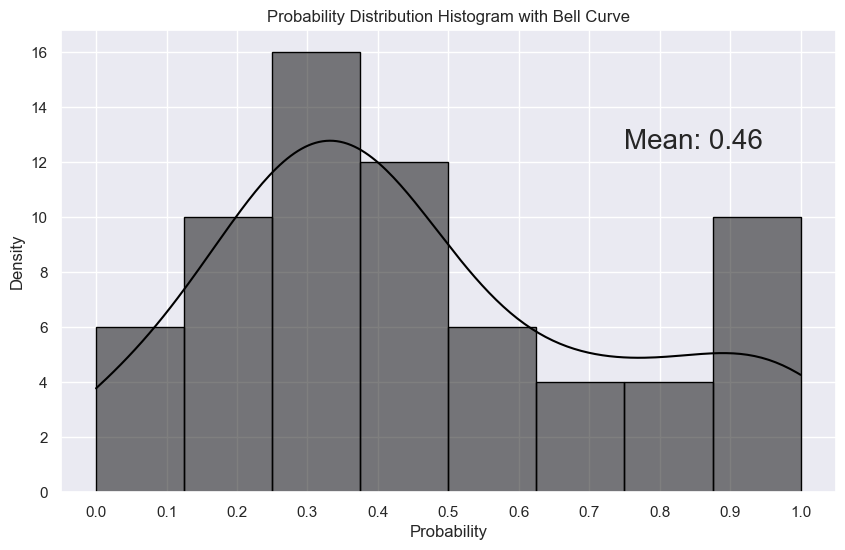

In [66]:
import seaborn as sns
import numpy as np

# Assuming result_prob DataFrame is already created

# Plot the histogram and bell curve line
plt.figure(figsize=(10, 6))
sns.histplot(result_prob['Probability'], kde = True, color='black', edgecolor='black')
plt.xticks(np.arange(0, 1.1, 0.1))

mean = result_prob['Probability'].mean()

plt.text(0.75, 12.5, f'Mean: {mean:.2f}', fontsize=20)


plt.title('Probability Distribution Histogram with Bell Curve')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.grid(True)
plt.show()




As you can see, we have a slight right skew distribution centered around 0.35 with high density from 0.9-1 due to the poorer teams who were very likely to lose round 1. 